Network Changes Predictions

In [11]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#location of where the data is found
outputdir = 'outputs/'

df_raildataOiDj = pd.read_csv(outputdir+'raildata_OiDj.csv')
#df_busdataOiDj = pd.read_csv(outputdir+'busdata_OiDj.csv')
#df_roaddataOiDj = pd.read_csv(outputdir+'roaddata_OiDj.csv')

#these work!
#inputs = df_raildataOiDj[["net_i", "net_j", "net_secs", "net_i_Oi_rail", "net_i_Oi_all", "net_j_Dj_rail", "net_j_Dj_all"]].to_numpy(dtype="float")
inputs = df_raildataOiDj[["net_i", "net_j", "net_secs", "scenarioLinkKMRail", "scenarioLinkSavedSecsRail"]].to_numpy(dtype="float")
#inputs = df_raildataOiDj[["net_i", "net_j"]].to_numpy(dtype="float")
#"one hot" coding on i and j
#inputs = np.zeros((df_raildataOiDj.shape[0], 8436*2), dtype="float")
#for index, row in df_raildataOiDj.iterrows():
#    #print(index, row['net_i'], row['net_j'])
#    inputs[index,int(row['net_i'])]=1.0
#    inputs[index,int(row['net_j'])]=1.0

targets = df_raildataOiDj["savedSecsRail"].to_numpy(dtype="float").reshape( (-1,1) )
###
#inputs = df_busdataOiDj[["net_i", "net_j", "net_secs", "savedSecsBus", "net_i_Oi_bus", "net_i_Oi_all", "net_j_Dj_bus", "net_j_Dj_all"]].to_numpy(dtype="float")
#targets = df_busdataOiDj["CkDiffBus"].to_numpy(dtype="float").reshape( (-1,1) )
###
#inputs = df_roaddataOiDj[["net_i", "net_j", "net_secs", "SavedSecsRoad", "net_i_Oi_road", "net_i_Oi_all", "net_j_Dj_road", "net_j_Dj_all"]].to_numpy(dtype="float")
#targets = df_roaddataOiDj["CkDiffRoad"].to_numpy(dtype="float").reshape( (-1,1) )

#normalise
iscaler = StandardScaler()
iscaler.fit(inputs)
tscaler = StandardScaler()
tscaler.fit(targets)
inputs = iscaler.transform(inputs)
targets = tscaler.transform(targets)

np.savetxt(outputdir+'ann_inputs.csv',inputs,delimiter=',',fmt='%g')
np.savetxt(outputdir+'ann_targets.csv',targets,delimiter=',',fmt='%g')

print('inputs shape=',inputs.shape)
print(inputs.dtype)
print('targets shape=',targets.shape)
print(targets.dtype)



inputs shape= (175793, 5)
float64
targets shape= (175793, 1)
float64


TRAINING

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 1024)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,705 (205.88 KB)

 Trainable params: 52,705 (205.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.6803 - mean_squared_error: 0.6803 - val_loss: 1.8693 - val_mean_squared_error: 1.8693
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.5733 - mean_squared_error: 0.5733 - val_loss: 1.8634 - val_mean_squared_error: 1.8634
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.5489 - mean_squared_error: 0.5489 - val_loss: 1.8996 - val_mean_squared_error: 1.8996
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.5446 - mean_squared_error: 0.5446 - val_loss: 1.9774 - val_mean_squared_error: 1.9774
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.5152 - mean_squared_error: 0.5152 - val_loss: 1.9826 - val_mean_squared_error: 1.9826
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.5195 - mean_squared_error: 0.5195 - val_loss: 1.9541 - val_mean_squared_error: 1.9541
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.5126 - mean_squared_error: 0.5126 - val_loss: 1.98

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R-Squared =  0.40911600692673766


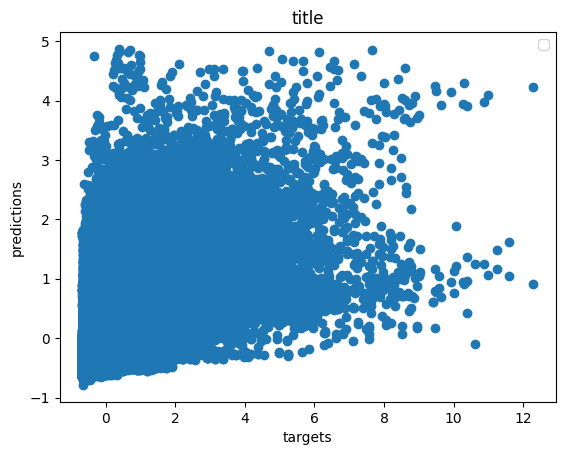

In [12]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow" #NOTE: you can use JAX as a backend too

import keras
from keras import layers

import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import r2_score


model = keras.Sequential(
     [
         keras.layers.Input(shape=(inputs.shape[1],)),
         #keras.layers.Normalization(axis=None),
         keras.layers.Dense(units=1024, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         ###
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         #keras.layers.Dropout(0.5),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=32, kernel_initializer='he_uniform', activation='relu', use_bias=True),
         keras.layers.Dense(units=1, activation='linear')
     ]
)

model.summary()

my_loss = keras.losses.MeanSquaredError()
my_metric = keras.metrics.MeanSquaredError()

model.compile(
    #loss=keras.losses.MeanSquaredError,
    loss=my_loss,
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    #optimizer=keras.optimizers.SGD(learning_rate=1e-3),
    #optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
    #metrics=[
    #    keras.metrics.MeanSquaredError(name="MSE"),
    #],
    metrics = [ my_metric ]
)

batch_size = 8192
epochs = 100

callbacks = [
    #keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    #keras.callbacks.EarlyStopping(monitor="val_loss", patience=25),
]

model.fit(
    inputs,
    targets,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(inputs, targets, verbose=0)
print(score)

model.save(outputdir+"final_model.keras") #model = keras.saving.load_model("final_model.keras")

predictions = model.predict(inputs)
r2 = r2_score(y_true=targets, y_pred=predictions)
print("R-Squared = ",r2)
plt.scatter(targets,predictions)
plt.title("title")
plt.xlabel("targets")
plt.ylabel("predictions")
#plt.plot([np.min(targets),np.max(targets)],[np.min(targets),np.max(targets)],color='green')
plt.legend()
plt.show
plt.savefig(outputdir+'output.png')
